### Identify the Penguin Types using Kmeans Clustering

In [165]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Read data

In [166]:
data = pd.read_csv('penguins.csv')
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [167]:
data.columns

Index(['rowid', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

Removing labels from data so we can perfrom ML techniques

In [168]:
penguins_df = data[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex',]]

#### Data cleaning

In [169]:
penguins_df.info()
df = penguins_df
df = df.dropna(axis = 0)
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                333 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### Outlier Identification

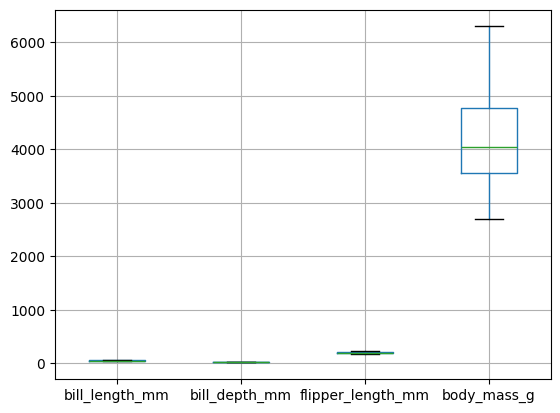

In [170]:
df.boxplot()
plt.show()
penguins_clean = df



#### Encoding Categorical data

In [171]:
df2 = pd.get_dummies(penguins_clean)
#df2 = df2.drop(columns = 'sex_.')
df2.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


#### If we see the statistics of the columns there is high variance amoung  the features so we need to normalize it inorder get best results out of KMeans clustering. 

In [172]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df2)
penguins_preprocessed = pd.DataFrame(data = data_scaled, columns = df2.columns )
penguins_preprocessed.describe()
#we can see all the features are normalised as Std 1 and mean 0 so that all features has equal importance

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02
mean,-1.024206e-15,-1.280257e-15,2.560514e-16,-1.280257e-16,-3.200643e-17,6.668006e-17
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,-9.910312e-01,-1.009050e+00
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,-9.910312e-01,-1.009050e+00
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,-9.910312e-01,9.910312e-01
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,1.009050e+00,9.910312e-01
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00,1.009050e+00,9.910312e-01


Identify the principal components using PCA

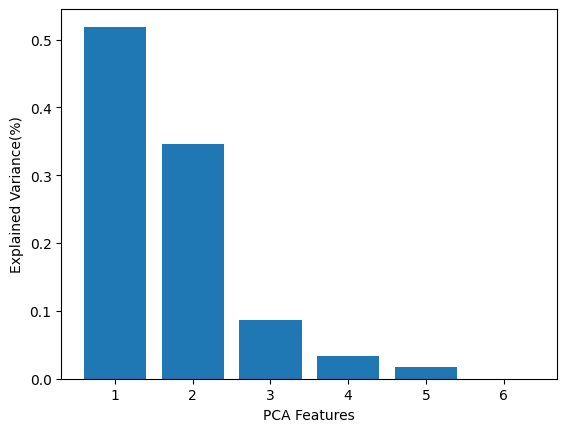

In [173]:
pca = PCA()
find_var = pca.fit(penguins_preprocessed)
feature_var = find_var.explained_variance_ratio_
components = find_var.n_components_
feature_var_ex = find_var.explained_variance_
plt.bar(range(1,7),feature_var)
plt.xlabel('PCA Features')
plt.ylabel('Explained Variance(%)')
plt.show()


This graph Shows how much percentage each feature is capable of explaining the model variance , we can clearly see only 2 features could explain almost 85% percent of the model variance. We are gonna only choose features which is explaining atleast 10% of the model variance.

In [174]:
n_components = (feature_var > 0.1).sum()
#fit and transform based on principle components
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

Identify the number of clusters for KMeans

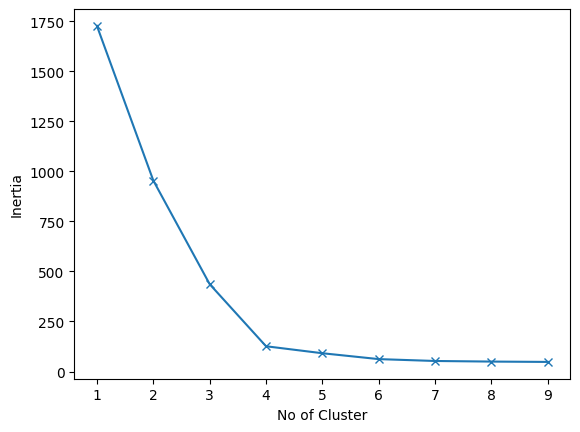

In [175]:
inertia = []
for i in range(1,10):
    k = KMeans(n_clusters = i , random_state = 30).fit(penguins_PCA)
    inertia.append(k.inertia_)
plt.plot(range(1,10),inertia, marker = 'x')
plt.xlabel('No of Cluster')
plt.ylabel('Inertia')
plt.show()


From above graph we can say 6 is the optimal choice since after 4 we can't see the rate of change of inertia much. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


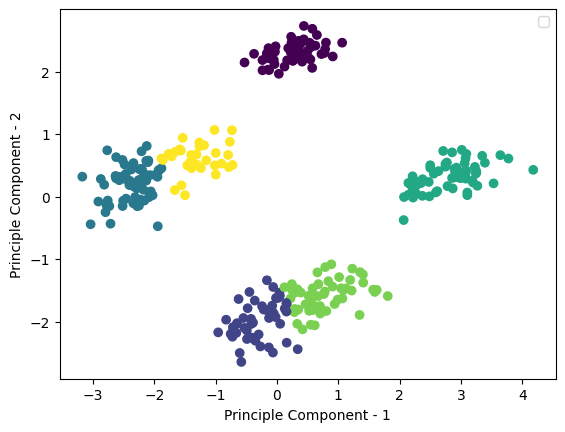

C:\Users\Karthi\AppData\Local\Temp\ipykernel_17904\3885602184.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['label'] = kmeans.labels_


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,male,1
1,39.5,17.4,186.0,3800.0,female,2
2,40.3,18.0,195.0,3250.0,female,2
4,36.7,19.3,193.0,3450.0,female,2
5,39.3,20.6,190.0,3650.0,male,1


In [176]:
n_cluster = 6
kmeans = KMeans(n_clusters = n_cluster,random_state = 30).fit(penguins_PCA)
kmeans.labels_
scatter = plt.scatter(penguins_PCA[:,0],penguins_PCA[:,1],c = kmeans.labels_)
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.xlabel('Principle Component - 1')
plt.ylabel('Principle Component - 2')
plt.legend()
plt.show()
penguins_clean['label'] = kmeans.labels_
penguins_clean.head()


In [177]:
penguins_clean.shape

(333, 6)

In [178]:
data_clean = data.dropna(axis = 0)

In [179]:
penguins_clean['species'] = data_clean['species']

C:\Users\Karthi\AppData\Local\Temp\ipykernel_17904\2781900469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean['species'] = data_clean['species']


In [180]:
cross_validation = pd.crosstab(penguins_clean['label'],penguins_clean['species'])
print(cross_validation)

species  Adelie  Chinstrap  Gentoo
label                             
0             0          0      58
1            50          1       0
2            68          5       0
3             0          0      61
4            23         33       0
5             5         29       0


In [181]:
data['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [182]:
penguins_clean['label'].value_counts()

label
2    73
3    61
0    58
4    56
1    51
5    34
Name: count, dtype: int64

It looks like Gentoo comes under cluster 0 and 3 and Cluster 1 and 2 Mostly belongs to Adelie and cluster 4 and 5 mostly belongs to chinstrap.